In [1]:
import os
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
TEXT_COLOR = '#313131'
LINE_COLORS = ['#00A082', '#F2CC38', '#9B59B6', '#3498DB', '#F39C12']

sns.set(
    style='darkgrid', 
    rc={'figure.figsize':(8,5),
        'figure.dpi': 150,
        'figure.facecolor': 'w', 
        'legend.facecolor': 'w',
        'text.color': TEXT_COLOR,
        'font.family': 'Microsoft Sans Serif', # 'Open Sans',
        'axes.labelcolor': TEXT_COLOR,
        'xtick.color': TEXT_COLOR,
        'ytick.color': TEXT_COLOR}
)

sns.set_palette(sns.color_palette(LINE_COLORS))

# Load data

In [4]:
# from kaggle.api.kaggle_api_extended import KaggleApi

# api = KaggleApi()
# api.authenticate()

In [5]:
# api.competition_download_files(
#     competition='house-prices-advanced-regression-techniques',
#     path='house-prices-dataset'
# )

In [6]:
# Documentation
with open("house-prices-dataset/data_description.txt", 'r') as f:
    lines = f.read()
    print(lines)

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

In [7]:
data = pd.read_csv('house-prices-dataset/train.csv')

In [8]:
data = data.drop('Id', axis=1)

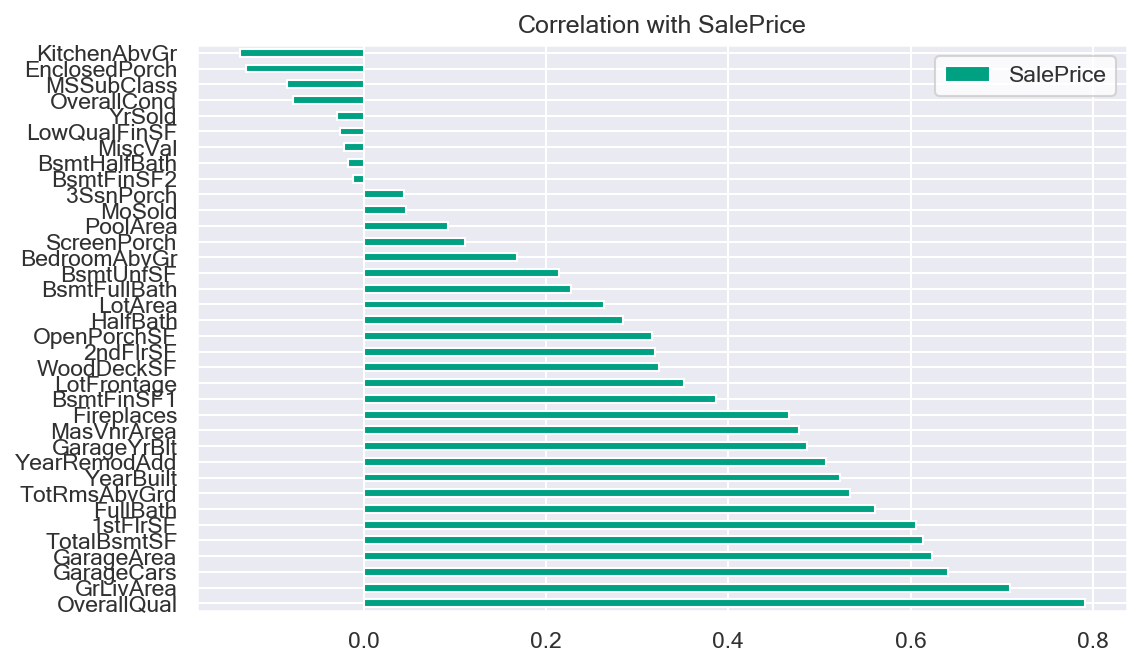

In [9]:
data.corr()[['SalePrice']].sort_values('SalePrice', ascending=False).drop('SalePrice').plot(kind='barh')
plt.title('Correlation with SalePrice');

# Data Cleaning

### Check null values

<AxesSubplot:>

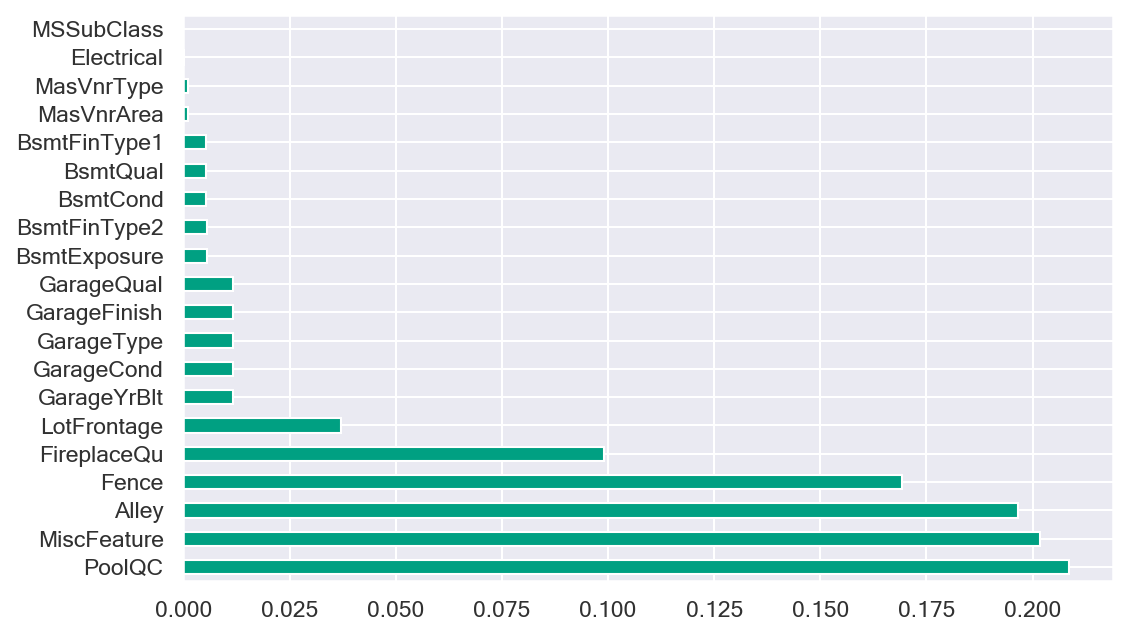

In [10]:
nans = data.isnull().sum()
nans /= nans.sum()
nans = nans.sort_values(ascending=False)
nans.iloc[:20].plot(kind='barh')

In [11]:
data.describe()

MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond  \
count  1460.000000  1201.000000    1460.000000  1460.000000  1460.000000   
mean     56.897260    70.049958   10516.828082     6.099315     5.575342   
std      42.300571    24.284752    9981.264932     1.382997     1.112799   
min      20.000000    21.000000    1300.000000     1.000000     1.000000   
25%      20.000000    59.000000    7553.500000     5.000000     5.000000   
50%      50.000000    69.000000    9478.500000     6.000000     5.000000   
75%      70.000000    80.000000   11601.500000     7.000000     6.000000   
max     190.000000   313.000000  215245.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2  ...  \
count  1460.000000   1460.000000  1452.000000  1460.000000  1460.000000  ...   
mean   1971.267808   1984.865753   103.685262   443.639726    46.549315  ...   
std      30.202904     20.645407   181.066207   456.098091   161.319273  ...   
min    1872.000000   1950.000000     0.000000     0.000000     0.000000  ...   
25%    1954.000000   1967.000000     0.000000     0.000000     0.000000  ...   
50%    1973.000000   1994.000000     0.000000   383.500000     0.000000  ...   
75%    2000.000000   2004.000000   166.000000   712.250000     0.000000  ...   
max    2010.000000   2010.000000  1600.000000  5644.000000  1474.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 37 columns]

PoolQC

```
Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       NA	No Pool
```

In [12]:
data['PoolQC'].value_counts()

Gd    3
Ex    2
Fa    2
Name: PoolQC, dtype: int64

In [13]:
pool_mapping = {
    np.nan: 0,
    'Fa': 1,
    'TA': 2,
    'Gd': 3,
    'Ex': 4
}

In [14]:
data['PoolQC'] = data['PoolQC'].map(pool_mapping)

MiscFeature

In [15]:
data['shed'] = data['MiscFeature'].map({'Shed': 1})
data['shed'].fillna(0, inplace=True)
data = data.drop('MiscFeature', axis=1)

Alley

```
Grvl	Gravel
Pave	Paved
```

In [16]:
data['Alley'].value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

In [17]:
data = pd.concat(
    [data.drop('Alley', axis=1),
    pd.get_dummies(data['Alley'])],
    axis=1
).rename({'Grvl': 'gravel_alley', 'Pave': 'paved_alley'}, axis=1)

Fence

```
Fence: Fence quality
		
       GdPrv	Good Privacy
       MnPrv	Minimum Privacy
       GdWo	Good Wood
       MnWw	Minimum Wood/Wire
       NA	No Fence

```

In [18]:
data['Fence'].value_counts()

MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: Fence, dtype: int64

In [19]:
data['fence_quality'] = data['Fence'].map({
    np.nan: 0, 'MnWw': 1, 'GdWo': 2, 'MnPrv': 3, 'GdPrv': 4
})

In [20]:
data = data.drop(['Fence'], axis=1)

FireplaceQu

```
FireplaceQu: Fireplace quality

       Ex	Excellent - Exceptional Masonry Fireplace
       Gd	Good - Masonry Fireplace in main level
       TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
       Fa	Fair - Prefabricated Fireplace in basement
       Po	Poor - Ben Franklin Stove
       NA	No Fireplace
```

In [21]:
data['FireplaceQu'].value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [22]:
data['fireplace_quality'] = data['FireplaceQu'].map({
    np.nan: 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5
})

In [23]:
data = data.drop('FireplaceQu', axis=1)

LotFrontage

```
LotFrontage: Linear feet of street connected to property

LotArea: Lot size in square feet
```

In [24]:
data[data['LotFrontage'].isnull()]

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
7             60       RL          NaN    10382   Pave      IR1         Lvl   
12            20       RL          NaN    12968   Pave      IR2         Lvl   
14            20       RL          NaN    10920   Pave      IR1         Lvl   
16            20       RL          NaN    11241   Pave      IR1         Lvl   
24            20       RL          NaN     8246   Pave      IR1         Lvl   
...          ...      ...          ...      ...    ...      ...         ...   
1429          20       RL          NaN    12546   Pave      IR1         Lvl   
1431         120       RL          NaN     4928   Pave      IR1         Lvl   
1441         120       RM          NaN     4426   Pave      Reg         Lvl   
1443          30       RL          NaN     8854   Pave      Reg         Lvl   
1446          20       RL          NaN    26142   Pave      IR1         Lvl   

     Utilities LotConfig LandSlope  ... MoSold YrSold SaleType SaleCondition  \
7       AllPub    Corner       Gtl  ...     11   2009       WD        Normal   
12      AllPub    Inside       Gtl  ...      9   2008       WD        Normal   
14      AllPub    Corner       Gtl  ...      5   2008       WD        Normal   
16      AllPub   CulDSac       Gtl  ...      3   2010       WD        Normal   
24      AllPub    Inside       Gtl  ...      5   2010       WD        Normal   
...        ...       ...       ...  ...    ...    ...      ...           ...   
1429    AllPub    Corner       Gtl  ...      4   2007       WD        Normal   
1431    AllPub    Inside       Gtl  ...     10   2009       WD        Normal   
1441    AllPub    Inside       Gtl  ...      5   2008       WD        Normal   
1443    AllPub    Inside       Gtl  ...      5   2009       WD        Normal   
1446    AllPub   CulDSac       Gtl  ...      4   2010       WD        Normal   

     SalePrice  shed  gravel_alley  paved_alley  fence_quality  \
7       200000   1.0             0            0              0   
12      144000   0.0             0            0              0   
14      157000   0.0             0            0              2   
16      149000   1.0             0            0              0   
24      154000   0.0             0            0              3   
...        ...   ...           ...          ...            ...   
1429    182900   0.0             0            0              0   
1431    143750   0.0             0            0              0   
1441    149300   0.0             0            0              0   
1443    121000   0.0             0            0              0   
1446    157900   0.0             0            0              0   

     fireplace_quality  
7                    3  
12                   0  
14                   2  
16                   3  
24                   3  
...                ...  
1429                 3  
1431                 0  
1441                 3  
1443                 4  
1446                 0  

[259 rows x 81 columns]

<AxesSubplot:xlabel='LotFrontage', ylabel='Count'>

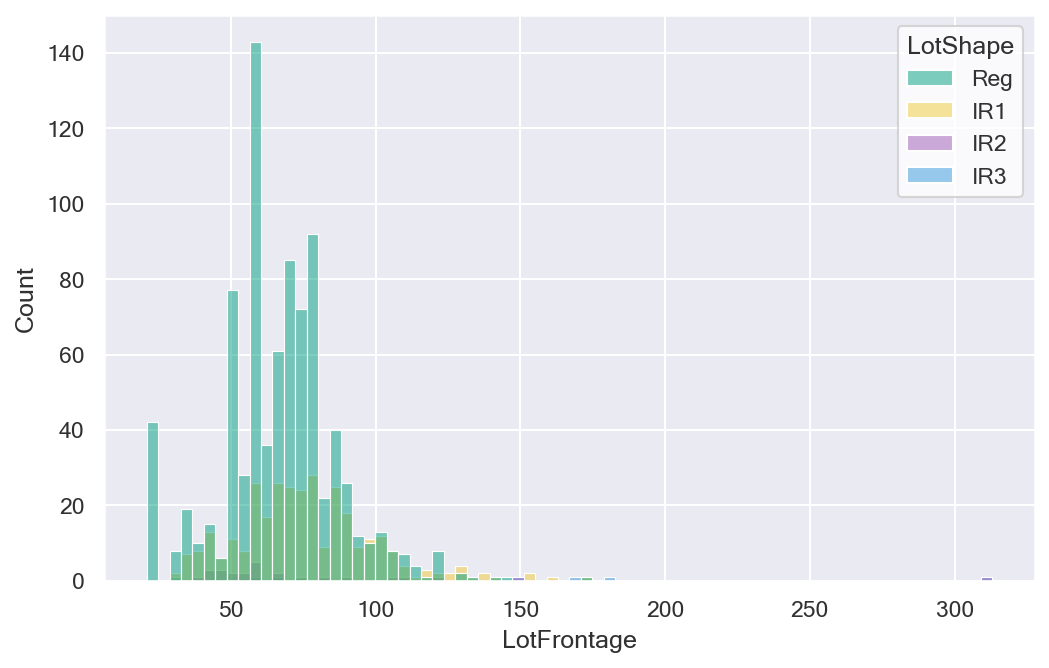

In [25]:
sns.histplot(data=data, x='LotFrontage', hue='LotShape')

<AxesSubplot:xlabel='LotFrontage', ylabel='LotArea'>

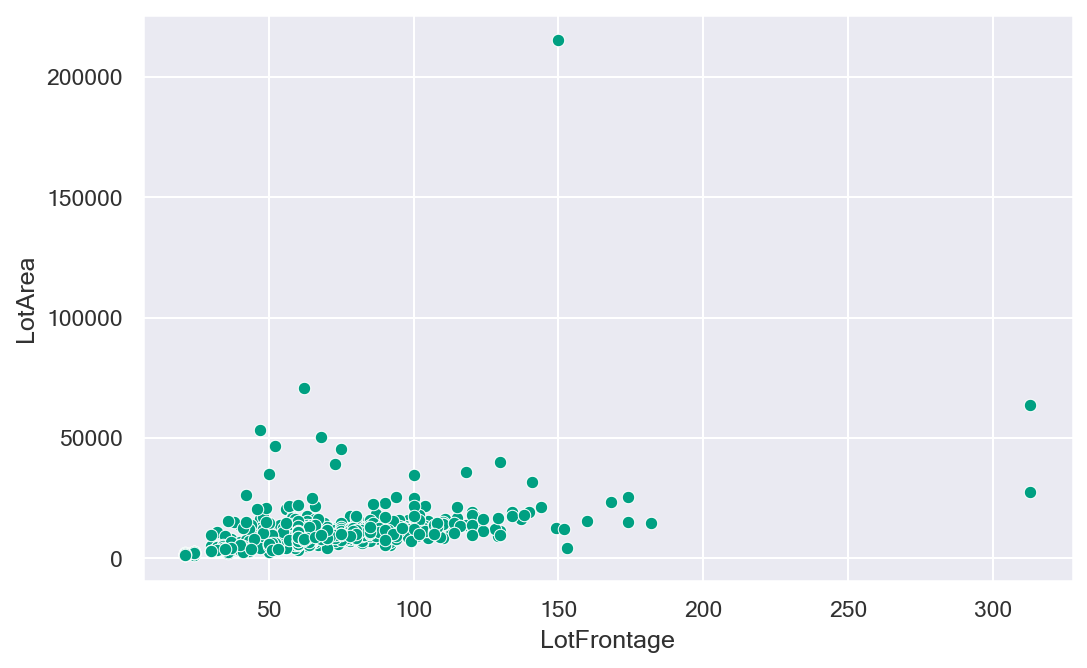

In [26]:
sns.scatterplot(data=data, x='LotFrontage', y='LotArea')

In [27]:
from statsmodels.formula.api import ols

In [28]:
lotFrontageEstimator = ols(formula='LotFrontage ~ LotArea', data=data).fit()

In [29]:
data['LotFrontage'] = data['LotFrontage'].fillna(lotFrontageEstimator.predict(data))

GarageQual

```
GarageQual: Garage quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage
```

In [30]:
data['GarageQual'].value_counts(dropna=False)

TA     1311
NaN      81
Fa       48
Gd       14
Ex        3
Po        3
Name: GarageQual, dtype: int64

In [31]:
data['garage_quality'] = data['GarageQual'].map({
    np.nan: 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5
})

In [32]:
data = data.drop('GarageQual', axis=1)

GarageCond

```
GarageCond: Garage condition

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage
```

In [33]:
data['GarageCond'].value_counts(dropna=False)

TA     1326
NaN      81
Fa       35
Gd        9
Po        7
Ex        2
Name: GarageCond, dtype: int64

In [34]:
data['garage_condition'] = data['GarageCond'].map({
    np.nan: 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5
})

In [35]:
data = data.drop('GarageCond', axis=1)

GarageFinish

```
GarageFinish: Interior finish of the garage

       Fin	Finished
       RFn	Rough Finished	
       Unf	Unfinished
       NA	No Garage
```

In [36]:
data['GarageFinish'].value_counts()

Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64

In [37]:
data['garage_finished_stage'] = data['GarageFinish'].map(
    {np.nan: 0, 'Unf': 1, 'RFn': 2, 'Fin': 3}
)

In [38]:
data = data.drop('GarageFinish', axis=1)

GarageYrBlt

`GarageYrBlt: Year garage was built`

In [39]:
data['GarageYrBlt'].value_counts(dropna=False)

NaN       81
2005.0    65
2006.0    59
2004.0    53
2003.0    50
          ..
1927.0     1
1900.0     1
1906.0     1
1908.0     1
1933.0     1
Name: GarageYrBlt, Length: 98, dtype: int64

In [40]:
data.corr()['GarageYrBlt'].sort_values(ascending=False).iloc[:5]

GarageYrBlt     1.000000
YearBuilt       0.825667
YearRemodAdd    0.642277
GarageCars      0.588920
GarageArea      0.564567
Name: GarageYrBlt, dtype: float64

In [41]:
data['GarageYrBlt'].fillna(data['YearBuilt'], inplace=True)

GarageType

```
GarageType: Garage location
		
       2Types	More than one type of garage
       Attchd	Attached to home
       Basment	Basement Garage
       BuiltIn	Built-In (Garage part of house - typically has room above garage)
       CarPort	Car Port
       Detchd	Detached from home
       NA	No Garage
```

In [42]:
data['GarageType'].value_counts(dropna=False)

Attchd     870
Detchd     387
BuiltIn     88
NaN         81
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [43]:
data = pd.concat(
    [data, pd.get_dummies(data['GarageType'], prefix='GarageType')], 
    axis=1
).drop('GarageType', axis=1)

### CHECK

<AxesSubplot:>

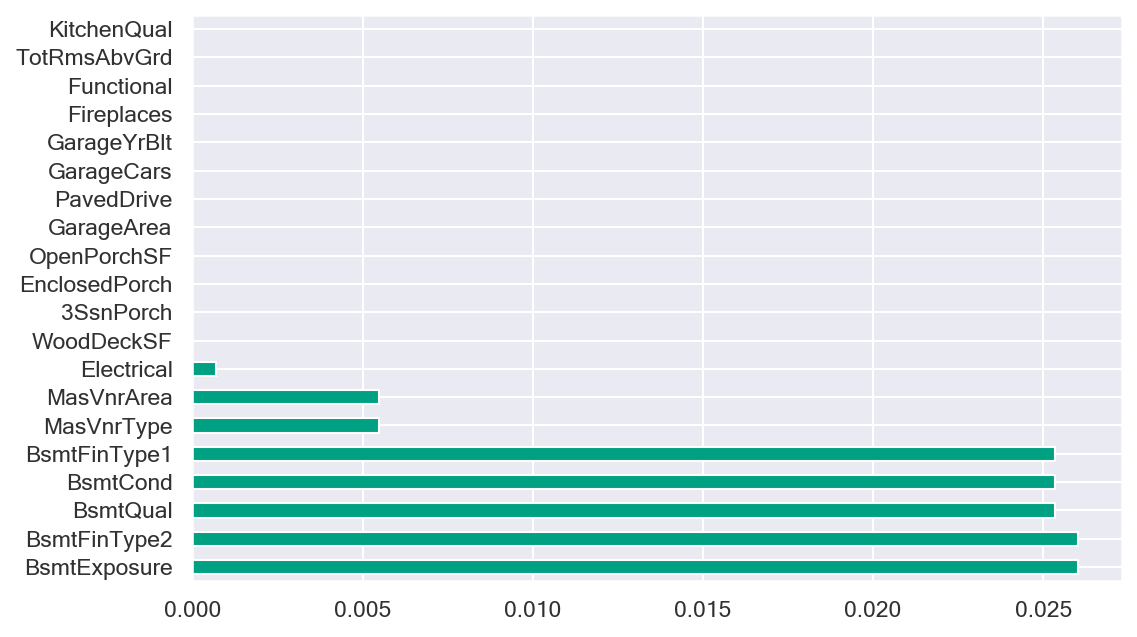

In [44]:
nans = data.isnull().sum()
nans /= data.shape[0]
nans = nans.sort_values(ascending=False)
nans.iloc[:20].plot(kind='barh')

BsmtFinType2

```
BsmtFinType2: Rating of basement finished area (if multiple types)

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement
```

In [45]:
data['BsmtFinType2'].value_counts(dropna=False)

Unf    1256
Rec      54
LwQ      46
NaN      38
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64

In [46]:
data['BsmtFinType2'] = data['BsmtFinType2'].map({
    'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6 
})

BsmtFinType1

```
BsmtFinType1: Rating of basement finished area

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement
```

In [47]:
data['BsmtFinType1'] = data['BsmtFinType1'].map({
    'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6 
})

BsmtCond

```
BsmtCond: Evaluates the general condition of the basement

       Ex	Excellent
       Gd	Good
       TA	Typical - slight dampness allowed
       Fa	Fair - dampness or some cracking or settling
       Po	Poor - Severe cracking, settling, or wetness
       NA	No Basement
```

In [48]:
data = data.dropna()

### Encode categorical features

In [49]:
def col_to_dummies(df, col):
    return pd.concat(
        [data, pd.get_dummies(data[col], prefix=col, drop_first=True)], 
        axis=1
    ).drop(col, axis=1)

In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1412 entries, 0 to 1459
Data columns (total 86 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   MSSubClass             1412 non-null   int64  
 1   MSZoning               1412 non-null   object 
 2   LotFrontage            1412 non-null   float64
 3   LotArea                1412 non-null   int64  
 4   Street                 1412 non-null   object 
 5   LotShape               1412 non-null   object 
 6   LandContour            1412 non-null   object 
 7   Utilities              1412 non-null   object 
 8   LotConfig              1412 non-null   object 
 9   LandSlope              1412 non-null   object 
 10  Neighborhood           1412 non-null   object 
 11  Condition1             1412 non-null   object 
 12  Condition2             1412 non-null   object 
 13  BldgType               1412 non-null   object 
 14  HouseStyle             1412 non-null   object 
 15  Over

PavedDrive

```
Y	Paved 
       P	Partial Pavement
       N	Dirt/Gravel
```

In [51]:
data['drive_paved_cond'] = data['PavedDrive'].map({'N': 0, 'P': 1, 'Y': 2})

In [52]:
data = data.drop('PavedDrive', axis=1)

Functional

```
Typ	Typical Functionality
       Min1	Minor Deductions 1
       Min2	Minor Deductions 2
       Mod	Moderate Deductions
       Maj1	Major Deductions 1
       Maj2	Major Deductions 2
       Sev	Severely Damaged
       Sal	Salvage only
```

In [53]:
data['Functional'].value_counts()

Typ     1322
Min2      31
Min1      28
Maj1      13
Mod       12
Maj2       5
Sev        1
Name: Functional, dtype: int64

In [54]:
data = col_to_dummies(data, 'Functional')

MSZoning

```
MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM	Residential Medium Density
```

In [55]:
data = col_to_dummies(data, 'MSZoning')

KitchenQual

```
KitchenQual: Kitchen quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
```

In [56]:
data['KitchenQual'] = data['KitchenQual'].map({
    'Po':0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4
})

Electrical

```
Electrical: Electrical system

       SBrkr	Standard Circuit Breakers & Romex
       FuseA	Fuse Box over 60 AMP and all Romex wiring (Average)	
       FuseF	60 AMP Fuse Box and mostly Romex wiring (Fair)
       FuseP	60 AMP Fuse Box and mostly knob & tube wiring (poor)
       Mix	Mixed
```

In [57]:
data = col_to_dummies(data, 'Electrical')

CentralAir

```
CentralAir: Central air conditioning

       N	No
       Y	Yes
```

In [58]:
data['CentralAir'] = data['CentralAir'].map({'Y': 1, 'N': 0})

Heating

```
Heating: Type of heating
		
       Floor	Floor Furnace
       GasA	Gas forced warm air furnace
       GasW	Gas hot water or steam heat
       Grav	Gravity furnace	
       OthW	Hot water or steam heat other than gas
       Wall	Wall furnace
```

In [59]:
data = col_to_dummies(data, 'Heating')

HeatingQC

```
HeatingQC: Heating quality and condition

       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
```

In [60]:
data['HeatingQC'] = data['HeatingQC'].map({
    'Po':0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4
})

BsmtExposure

```
BsmtExposure: Refers to walkout or garden level walls

       Gd	Good Exposure
       Av	Average Exposure (split levels or foyers typically score average or above)	
       Mn	Mimimum Exposure
       No	No Exposure
       NA	No Basement
```

In [61]:
data['BsmtExposure'] = data['BsmtExposure'].map({
    np.nan:0, 'No': 1, 'Mn': 2, 'Av': 3, 'Gd': 4
})

```
ExterQual: Evaluates the quality of the material on the exterior 
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
```

In [62]:
data['ExterQual'] = data['ExterQual'].map({
    'Po':0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4
})

```
ExterCond: Evaluates the present condition of the material on the exterior
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
```

In [63]:
data['ExterCond'] = data['ExterCond'].map({
    'Po':0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4
})

```
Foundation: Type of foundation
		
       BrkTil	Brick & Tile
       CBlock	Cinder Block
       PConc	Poured Contrete	
       Slab	Slab
       Stone	Stone
       Wood	Wood
```

In [64]:
data = col_to_dummies(data, 'Foundation')

BsmtQual: Evaluates the height of the basement

       Ex	Excellent (100+ inches)	
       Gd	Good (90-99 inches)
       TA	Typical (80-89 inches)
       Fa	Fair (70-79 inches)
       Po	Poor (<70 inches
       NA	No Basement
		
BsmtCond: Evaluates the general condition of the basement

       Ex	Excellent
       Gd	Good
       TA	Typical - slight dampness allowed
       Fa	Fair - dampness or some cracking or settling
       Po	Poor - Severe cracking, settling, or wetness
       NA	No Basement

In [65]:
data['BsmtQual'] = data['BsmtQual'].map({
    'Po':0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4
})

In [66]:
data['BsmtCond'] = data['BsmtCond'].map({
    'Po':0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4
})

HouseStyle

```
HouseStyle: Style of dwelling
	
       1Story	One story
       1.5Fin	One and one-half story: 2nd level finished
       1.5Unf	One and one-half story: 2nd level unfinished
       2Story	Two story
       2.5Fin	Two and one-half story: 2nd level finished
       2.5Unf	Two and one-half story: 2nd level unfinished
       SFoyer	Split Foyer
       SLvl	Split Level
```

In [67]:
data = col_to_dummies(data, 'HouseStyle')

```
LotShape: General shape of property

       Reg	Regular	
       IR1	Slightly irregular
       IR2	Moderately Irregular
       IR3	Irregular
```

In [68]:
data['shape_irregularity'] = data['LotShape'].map({
    'Reg': 0, 'IR1': 1, 'IR2': 2, 'IR3': 3
})

In [69]:
data = data.drop('LotShape', axis=1)

```
LandContour: Flatness of the property

       Lvl	Near Flat/Level	
       Bnk	Banked - Quick and significant rise from street grade to building
       HLS	Hillside - Significant slope from side to side
       Low	Depression
```

In [70]:
data['flatness'] = data['LandContour'].map({
    'Low': 0, 'HLS': 1, 'Bnk': 2, 'Lvl': 3
})

In [71]:
data = data.drop('LandContour', axis=1)

```
Utilities: Type of utilities available
		
       AllPub	All public Utilities (E,G,W,& S)	
       NoSewr	Electricity, Gas, and Water (Septic Tank)
       NoSeWa	Electricity and Gas Only
       ELO	Electricity only
```

In [72]:
data['utilities_availability'] = data['Utilities'].map({
    'ELO': 0, 'NoSeWa': 1, 'NoSewr': 2, 'AllPub': 3
})

In [73]:
data = data.drop('Utilities', axis=1)

```
LotConfig: Lot configuration

       Inside	Inside lot
       Corner	Corner lot
       CulDSac	Cul-de-sac
       FR2	Frontage on 2 sides of property
       FR3	Frontage on 3 sides of property
```

In [74]:
data = col_to_dummies(data, 'LotConfig')

```
LandSlope: Slope of property
		
       Gtl	Gentle slope
       Mod	Moderate Slope	
       Sev	Severe Slope
```

In [75]:
data['landslope_severity'] = data['LandSlope'].map({
    'Gtl': 0, 'Mod': 1, 'Sev': 2
})

In [76]:
data = data.drop('LandSlope', axis=1)

```
Neighborhood: Physical locations within Ames city limits

       Blmngtn	Bloomington Heights
       Blueste	Bluestem
       BrDale	Briardale
       BrkSide	Brookside
       ClearCr	Clear Creek
       CollgCr	College Creek
       Crawfor	Crawford
       Edwards	Edwards
       Gilbert	Gilbert
       IDOTRR	Iowa DOT and Rail Road
       MeadowV	Meadow Village
       Mitchel	Mitchell
       Names	North Ames
       NoRidge	Northridge
       NPkVill	Northpark Villa
       NridgHt	Northridge Heights
       NWAmes	Northwest Ames
       OldTown	Old Town
       SWISU	South & West of Iowa State University
       Sawyer	Sawyer
       SawyerW	Sawyer West
       Somerst	Somerset
       StoneBr	Stone Brook
       Timber	Timberland
       Veenker	Veenker
```

In [77]:
data = col_to_dummies(data, 'Neighborhood')

```
Condition1: Proximity to various conditions
	
       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad
	
Condition2: Proximity to various conditions (if more than one is present)
		
       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad
	
BldgType: Type of dwelling
		
       1Fam	Single-family Detached	
       2FmCon	Two-family Conversion; originally built as one-family dwelling
       Duplx	Duplex
       TwnhsE	Townhouse End Unit
       TwnhsI	Townhouse Inside Unit
```

In [78]:
data = col_to_dummies(data, 'Condition1')

In [79]:
data = col_to_dummies(data, 'Condition2')

In [80]:
data = col_to_dummies(data, 'BldgType')

```
Street: Type of road access to property

       Grvl	Gravel	
       Pave	Paved
```

In [81]:
data = col_to_dummies(data, 'Street')

```
RoofStyle: Type of roof

       Flat	Flat
       Gable	Gable
       Gambrel	Gabrel (Barn)
       Hip	Hip
       Mansard	Mansard
       Shed	Shed
		
RoofMatl: Roof material

       ClyTile	Clay or Tile
       CompShg	Standard (Composite) Shingle
       Membran	Membrane
       Metal	Metal
       Roll	Roll
       Tar&Grv	Gravel & Tar
       WdShake	Wood Shakes
       WdShngl	Wood Shingles
		
Exterior1st: Exterior covering on house

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast	
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles
	
Exterior2nd: Exterior covering on house (if more than one material)

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles
	
MasVnrType: Masonry veneer type

       BrkCmn	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       None	None
       Stone	Stone
```

In [82]:
data = col_to_dummies(data, 'RoofStyle')

In [83]:
data = col_to_dummies(data, 'RoofMatl')

In [84]:
data = col_to_dummies(data, 'Exterior1st')

In [85]:
data = col_to_dummies(data, 'Exterior2nd')

In [86]:
data = col_to_dummies(data, 'MasVnrType')

In [87]:
data = col_to_dummies(data, 'SaleType')

In [88]:
data = col_to_dummies(data, 'SaleCondition')

# EDA

<AxesSubplot:>

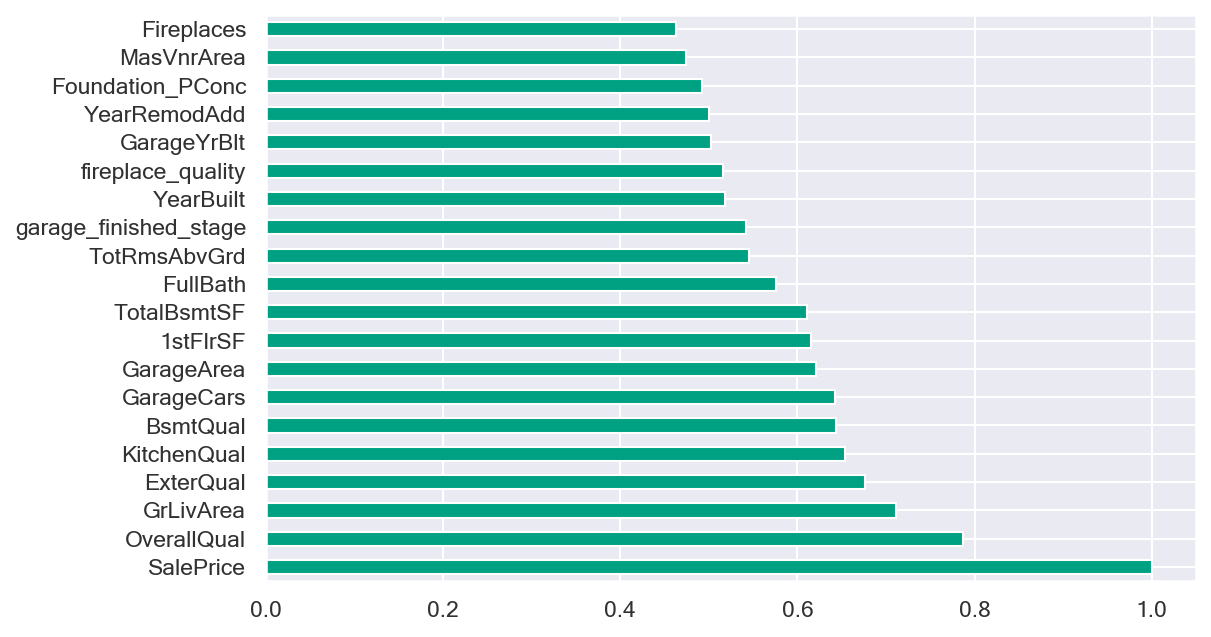

In [89]:
data.corr()['SalePrice'].sort_values(ascending=False).iloc[:20].plot(kind='barh')

In [90]:
top_feat = data.corr()['SalePrice'].sort_values(ascending=False).iloc[:5].index.tolist()

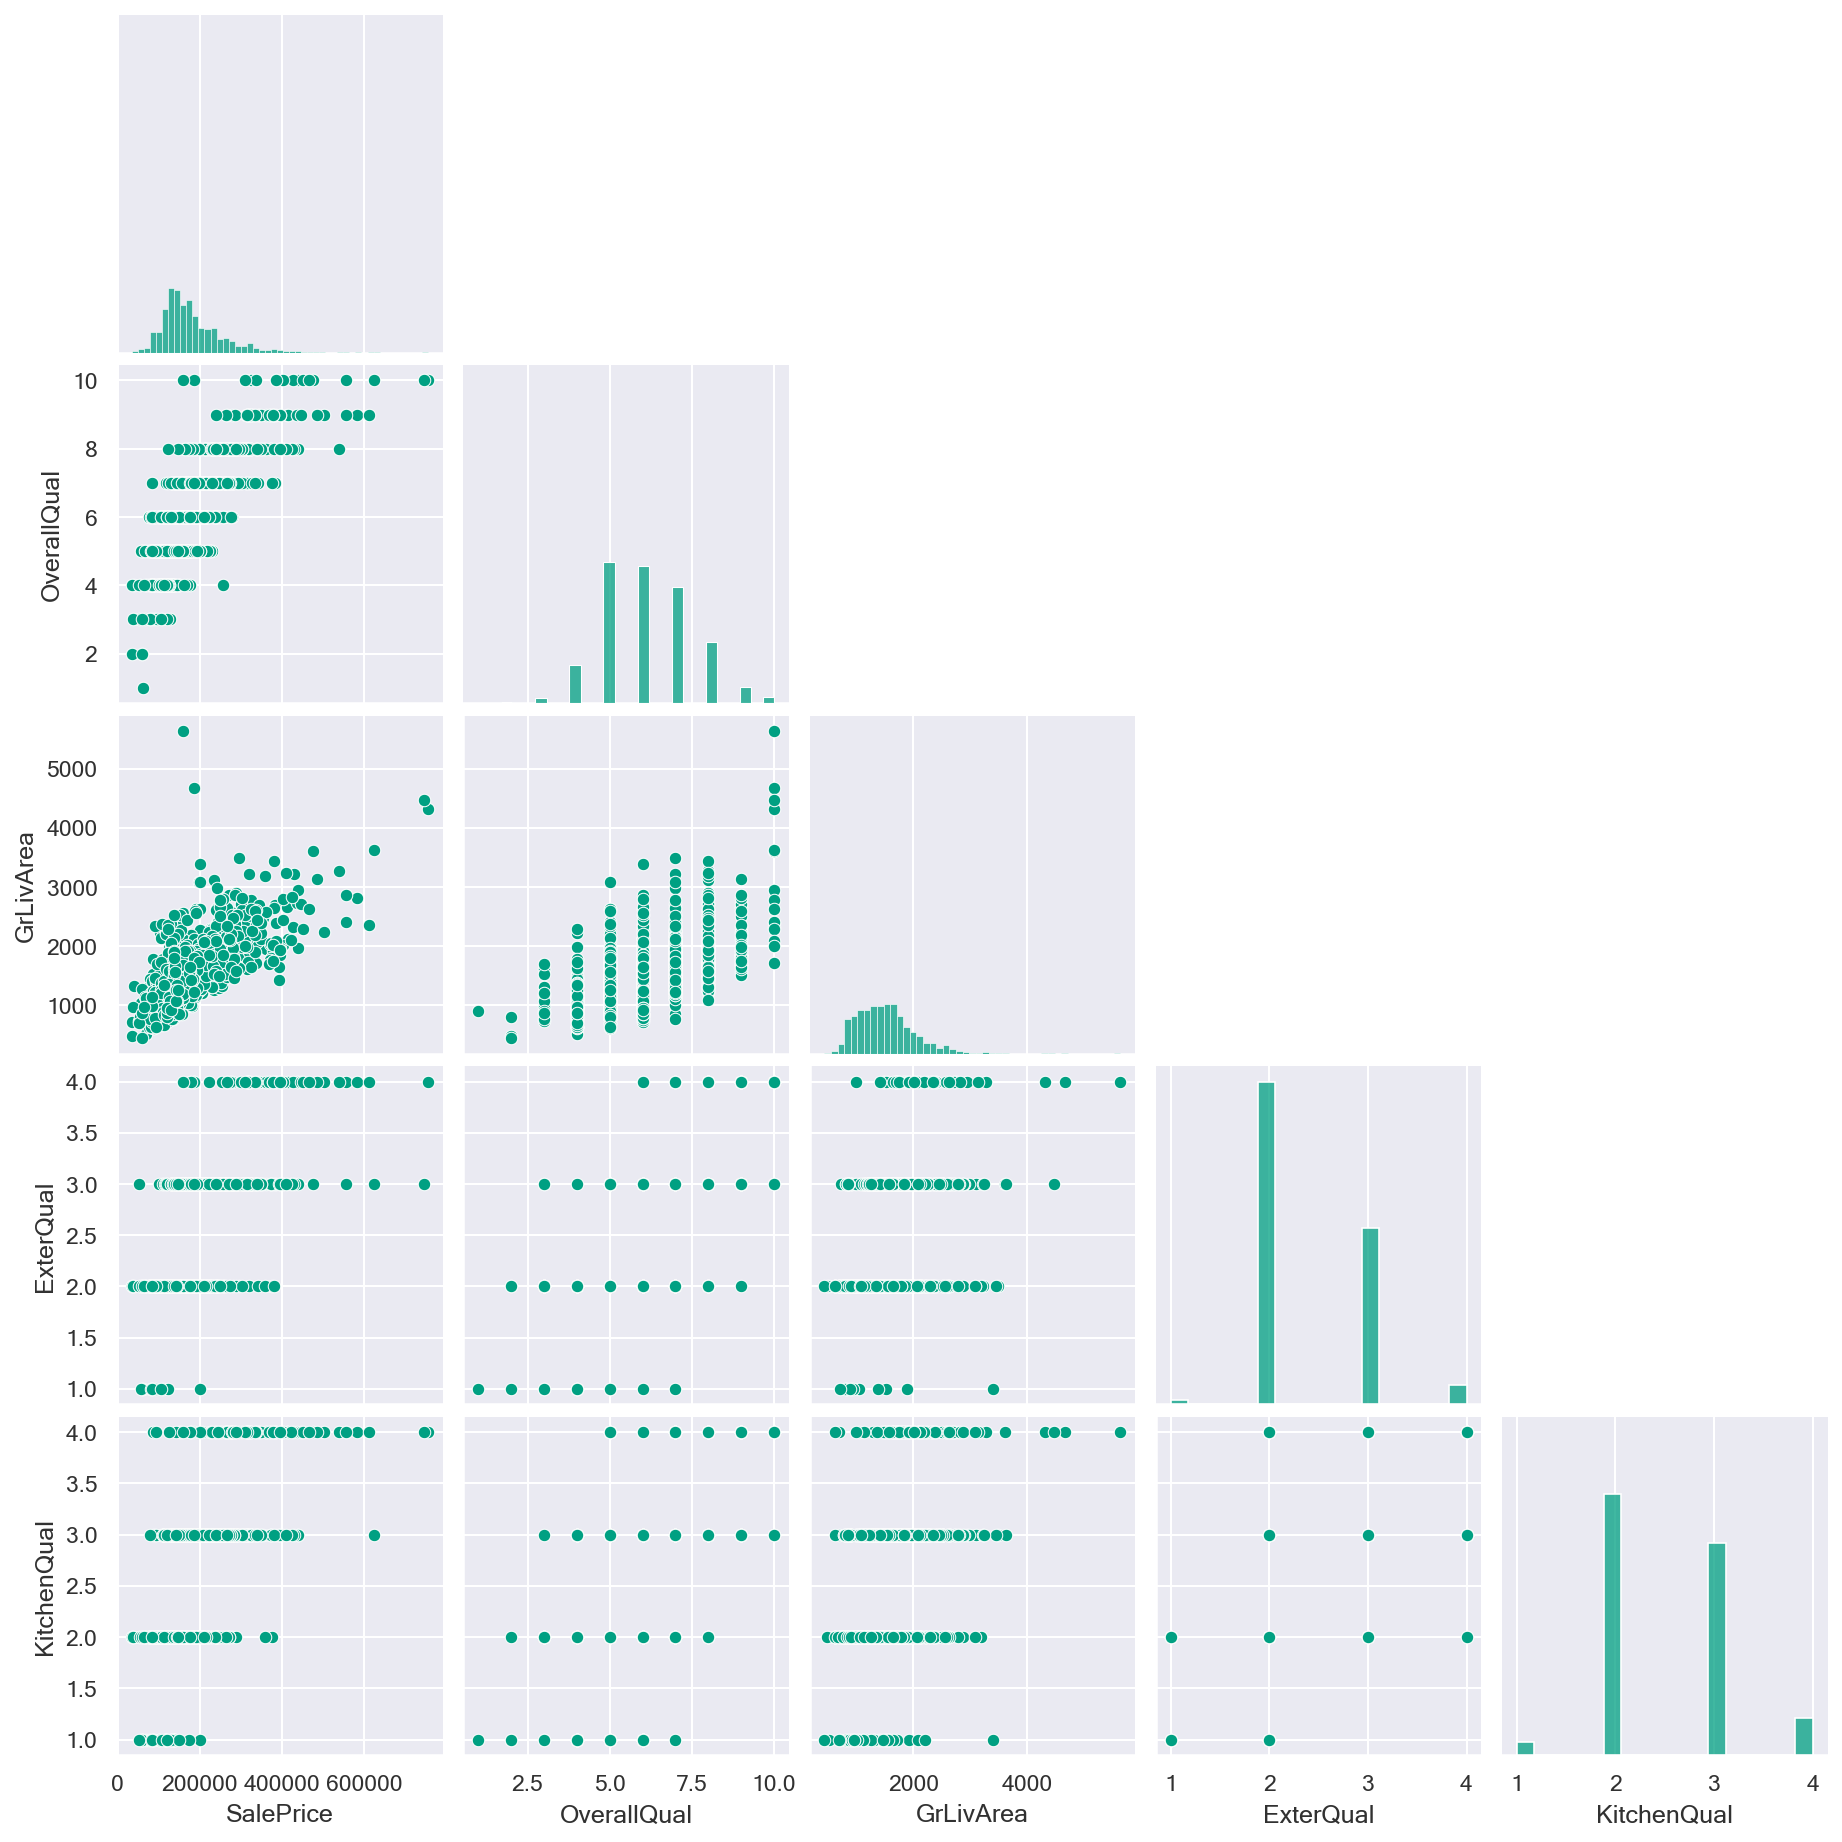

In [91]:
sns.pairplot(data=data[top_feat], corner=True)

# 1. Pre-processing input features

When to do it:
- When feature distribution is skewed.

Techniques:
- log-transform: Squashes large numbers and expands small numbers, reducing the skewness in the data
- Scale the features:
    - StandardScaler
    - MinMaxScaler

In [92]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer

# 2. Pre-processing of target

When to do it:
- When the target distribution is skewed. Why this is bad: When performing gradient descent, training samples with extreme targets will receive more attention than what they really need. This will bias the model to learn towards predicting them better and the rest worse.

Techniques:
- Take the log of the target
- Box Cox transformation

Text(0, 0.5, 'log-transformed')

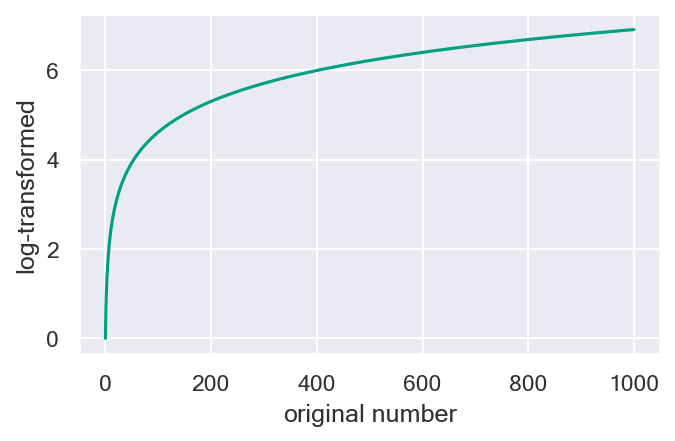

In [93]:
plt.figure(figsize=(5,3))
plt.plot(np.arange(1, 1000), np.log(np.arange(1, 1000)))
plt.xlabel("original number")
plt.ylabel("log-transformed")

Text(0.5, 1.0, 'Log-transformed')

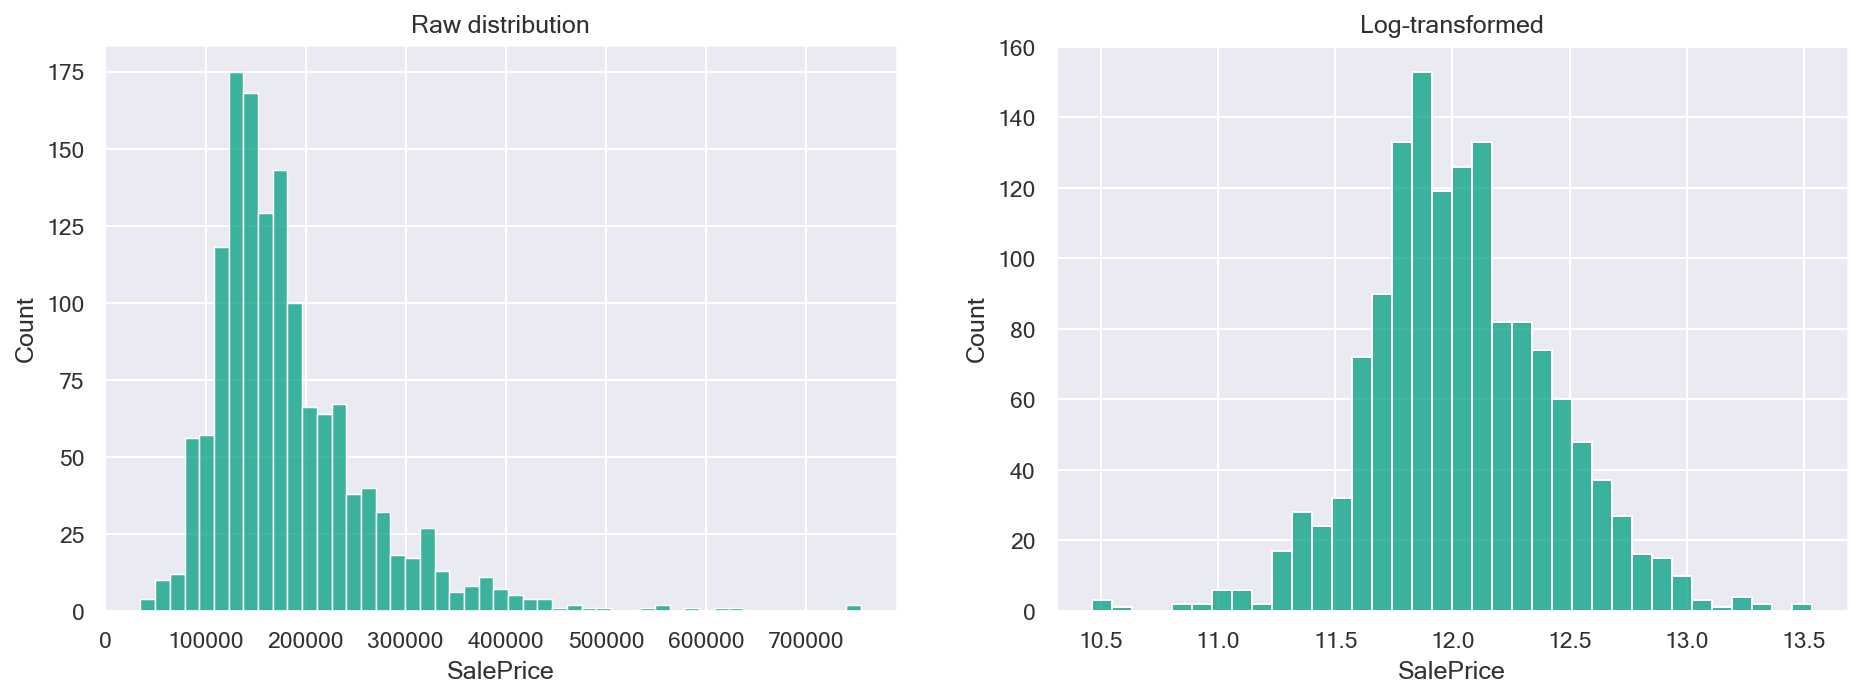

In [94]:
fig, axs = plt.subplots(ncols=2, figsize=(15,5))
sns.histplot(data=data, x='SalePrice', ax=axs[0])
axs[0].set_title('Raw distribution')
sns.histplot(data=data[['SalePrice']].apply(np.log), x='SalePrice', ax=axs[1])
axs[1].set_title('Log-transformed')

# Baseline model
Predict based on overall quality, average price of a mark

Evaluate based on MAE & RMSE

In [95]:
from sklearn.model_selection import train_test_split

In [96]:
X = data.drop('SalePrice', axis=1).copy()

In [97]:
y = data['SalePrice'].copy()

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=101)

In [99]:
baseline_preds = data[data.index.isin(X_train.index.tolist())].groupby('OverallQual').mean()[['SalePrice']]

In [100]:
baseline_preds = {row.name: row.values[0] for _, row in baseline_preds.iterrows()}

In [101]:
y_pred = X_test['OverallQual'].map(baseline_preds)

In [102]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

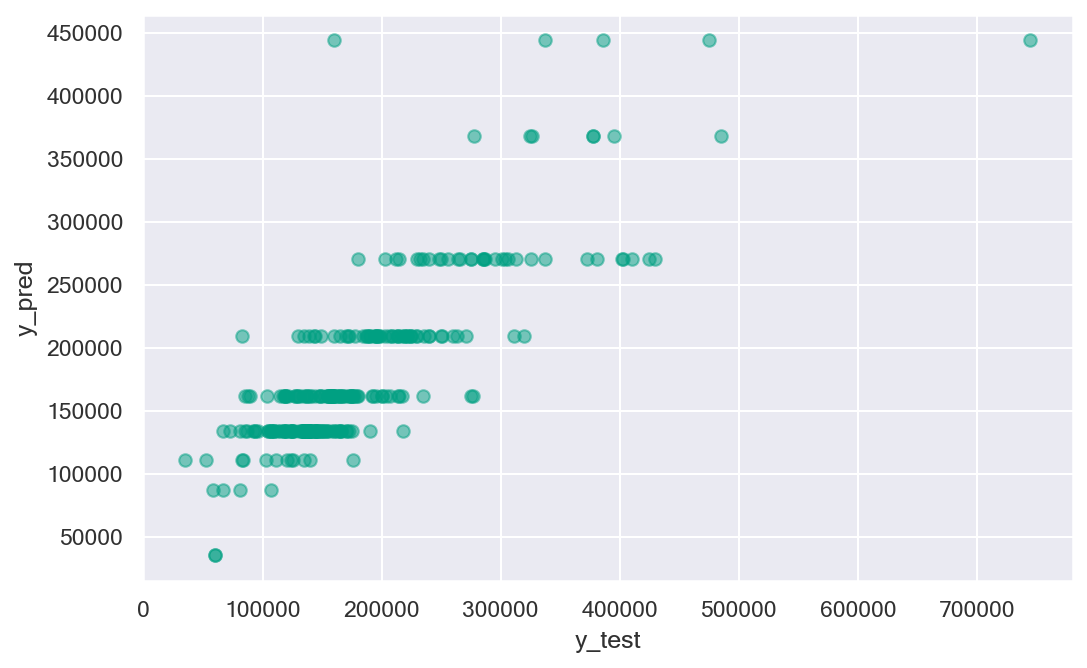

In [103]:
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('y_test')
plt.ylabel('y_pred');

In [104]:
def evaluate(y_test, y_pred):
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print(f'''MAE:\t{mae}\nRMSE:\t{rmse}''')
    plt.figure(figsize=(5,5))
    plt.scatter(y_test, y_pred, alpha=0.4)
    plt.plot(*2*[np.arange(0,500000)], color='r', ls='--')
    plt.xlabel('y true')
    plt.ylabel('y pred')
    plt.ylim(0, 500000)
    plt.xlim(0, 500000)
    plt.show()

MAE:	30825.205622038615
RMSE:	47984.427300321295


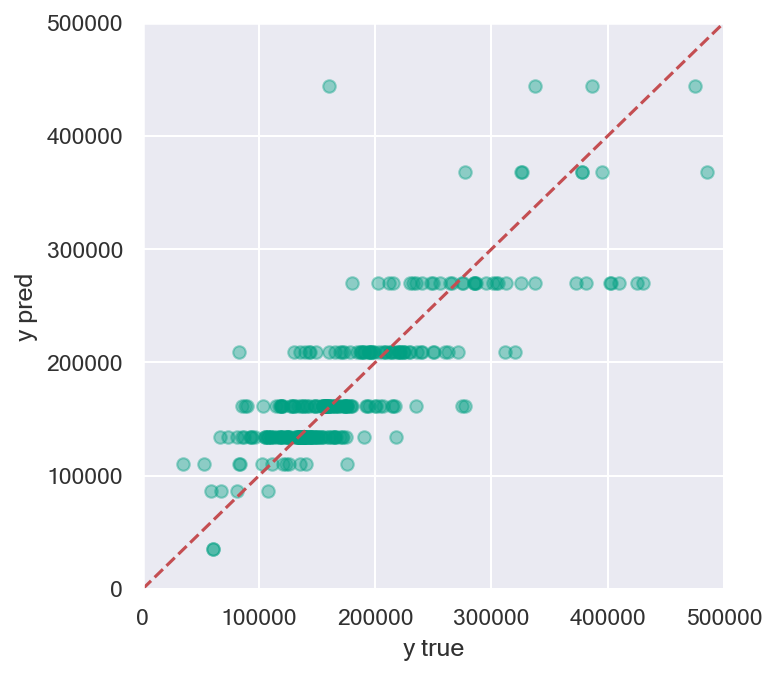

In [105]:
# Baseline
evaluate(y_test, y_pred)

# 1: Linear regression

## 1.0. No preprocessing

In [106]:
from sklearn.linear_model import LinearRegression

In [107]:
model = LinearRegression()

In [108]:
model.fit(X_train, y_train)

LinearRegression()

In [109]:
y_pred = model.predict(X_test)

MAE:	21990.52913553093
RMSE:	47941.22267198109


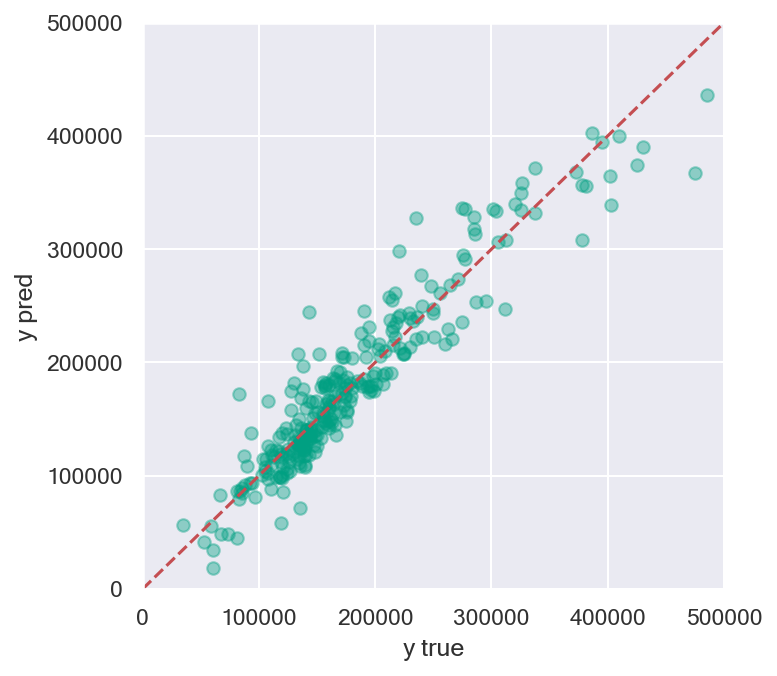

In [110]:
evaluate(y_test, y_pred)

## 1.1. StandardScaler for input features

In [111]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer

In [112]:
standard_scaler = StandardScaler()

In [113]:
X_train_stnd_scaled = standard_scaler.fit_transform(X_train)
X_test_stnd_scaled = standard_scaler.transform(X_test)

In [114]:
model = LinearRegression()

In [115]:
model.fit(X_train_stnd_scaled, y_train)

LinearRegression()

In [116]:
y_pred = model.predict(X_test_stnd_scaled)

MAE:	150735404983216.47
RMSE:	2473512036312313.0


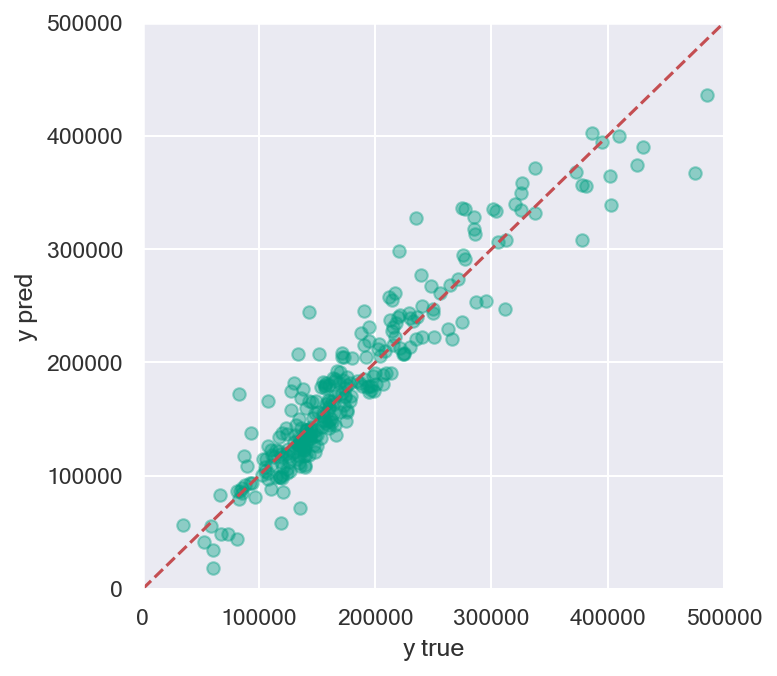

In [117]:
evaluate(y_test, y_pred)

## 1.2. MinMaxScaler for input features

In [118]:
min_max_scaler = MinMaxScaler()

In [119]:
X_train_minmax_scaled = min_max_scaler.fit_transform(X_train)
X_test_minmax_scaled = min_max_scaler.transform(X_test)

In [120]:
model = LinearRegression()

In [121]:
model.fit(X_train_minmax_scaled, y_train)

LinearRegression()

In [122]:
y_pred = model.predict(X_test_minmax_scaled)

MAE:	107601077854671.48
RMSE:	1266073169355436.0


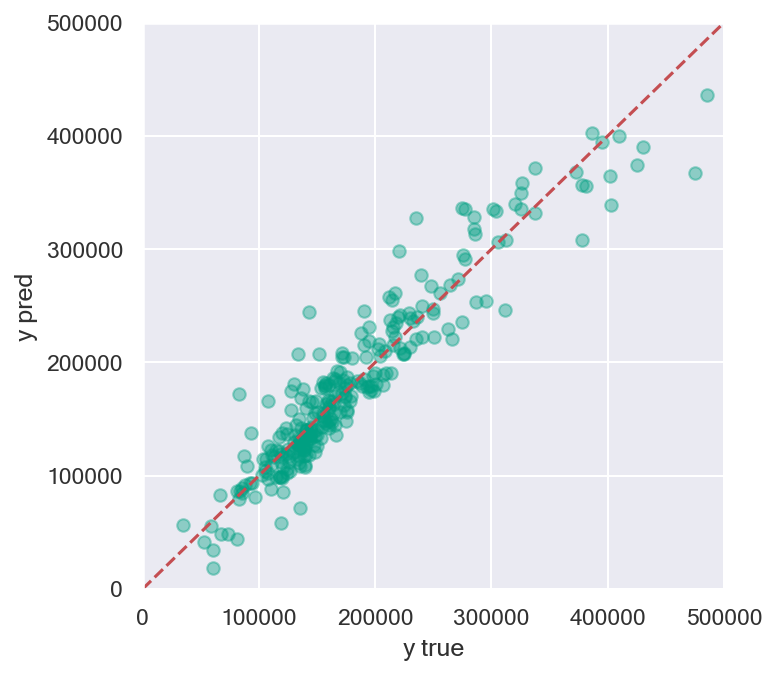

In [123]:
evaluate(y_test, y_pred)

## 1.3. log-transform for targets

In [124]:
y_train_log = y_train.apply(np.log)
y_test_log = y_test.apply(np.log)

In [125]:
model = LinearRegression()

In [126]:
model.fit(X_train, y_train_log)

LinearRegression()

In [127]:
y_pred = model.predict(X_test)

In [128]:
y_pred = np.exp(y_pred)

MAE:	24748.7138441339
RMSE:	155516.5219153956


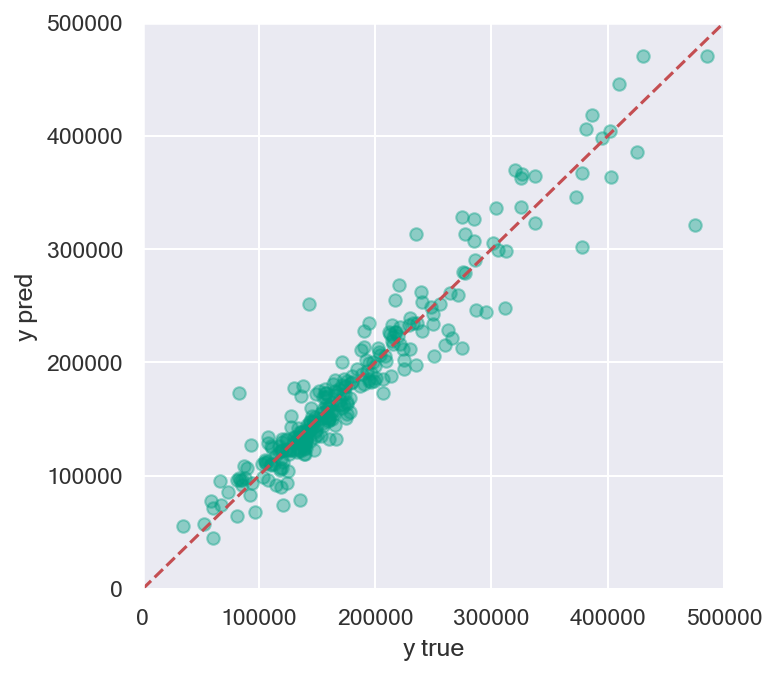

In [129]:
evaluate(y_test, y_pred)

In [134]:
residuals = y_test - y_pred

In [152]:
X_test.iloc[abs(residuals).argmax()]

MSSubClass                  60.0
LotFrontage                313.0
LotArea                  63887.0
OverallQual                 10.0
OverallCond                  5.0
                          ...   
SaleCondition_AdjLand        0.0
SaleCondition_Alloca         0.0
SaleCondition_Family         0.0
SaleCondition_Normal         0.0
SaleCondition_Partial        1.0
Name: 1298, Length: 198, dtype: float64

In [155]:
data.iloc[1298]

MSSubClass                  60.0
LotFrontage                 85.0
LotArea                  11103.0
OverallQual                  7.0
OverallCond                  5.0
                          ...   
SaleCondition_AdjLand        0.0
SaleCondition_Alloca         0.0
SaleCondition_Family         0.0
SaleCondition_Normal         0.0
SaleCondition_Partial        1.0
Name: 1344, Length: 199, dtype: float64

In [153]:
y_test.iloc[abs(residuals).argmax()]

160000

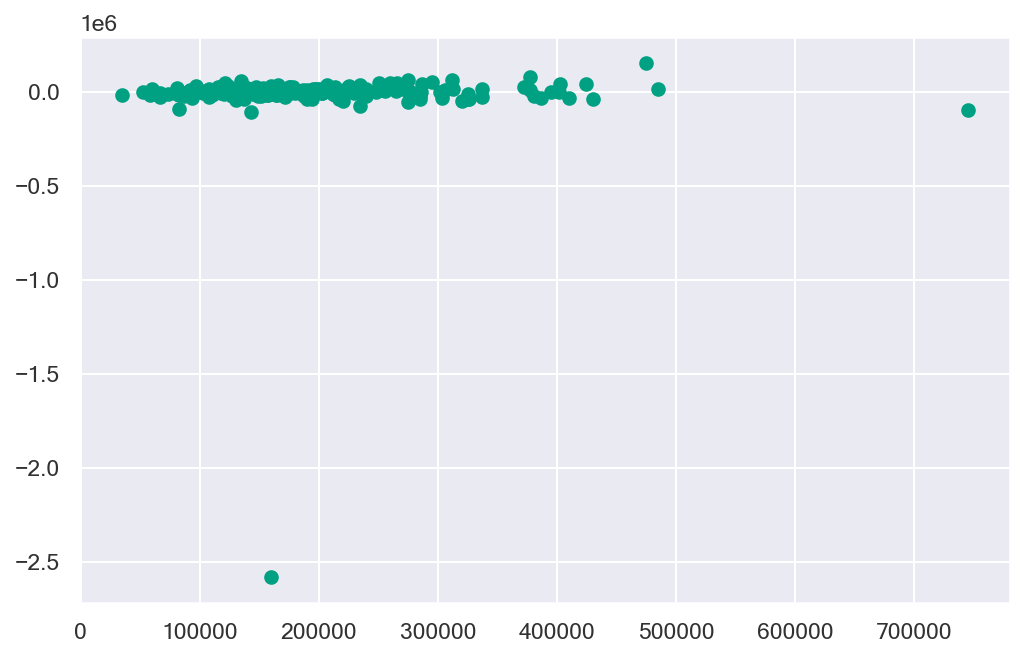

In [147]:
plt.scatter(y_test, residuals)

### Lasso - What features are not important?

# 2. LightGBM

In [1]:
# from lightgbm import LGBMRegressor

# 3. XGBoost

# 4. Random Forest